# Geothermal Economics - Workshop Notebook - PyThermoNomics

---

Open-source techno-economic calculation module specialized for detailed planning of geothermal projects.

Stephan de Hoop, Sławomir Szklarz, Jan-Diederik van Wees, Eduardo Barros, Jens Wollenweber

<p align=center>
<img src="../docs/logo/logo_PyThermoNomics.png" width="400"/>
</p>

## Agenda
1. PyThermoNomics: introduction
2. Techno-economic formulas
3. Structure of the module
4. Overview of input / output standards
5. Code repository and installation
6. Example for 3D realistic aquifer
8. Conclusions and future outlook

---

## 1. PyThermoNomics

PyThermoNomics provides tools for geothermal economics calculations, including Net Present Value (NPV) and Levelized Cost of Energy (LCOE) computations, well simulation, and more.

### Features

- Calculate NPV and LCOE for geothermal projects
- Integrate simulation results (CSV, OPM/Eclipse output)
- Model well trajectories and deviations
- Flexible configuration via YAML files
- Command-line interface (CLI) for easy usage
- Extensible API for custom workflows
- Documentation and tests included


### Key considerations
- Variable number of injectors and producers
- Accounting for presure loss due to friction in wells
- Detailed economic scenarios: loan, subsidy, inflation, tax, discounting, etc...
- Generic: considering arbitrary trajectories and well production/injection time series

### Workflow

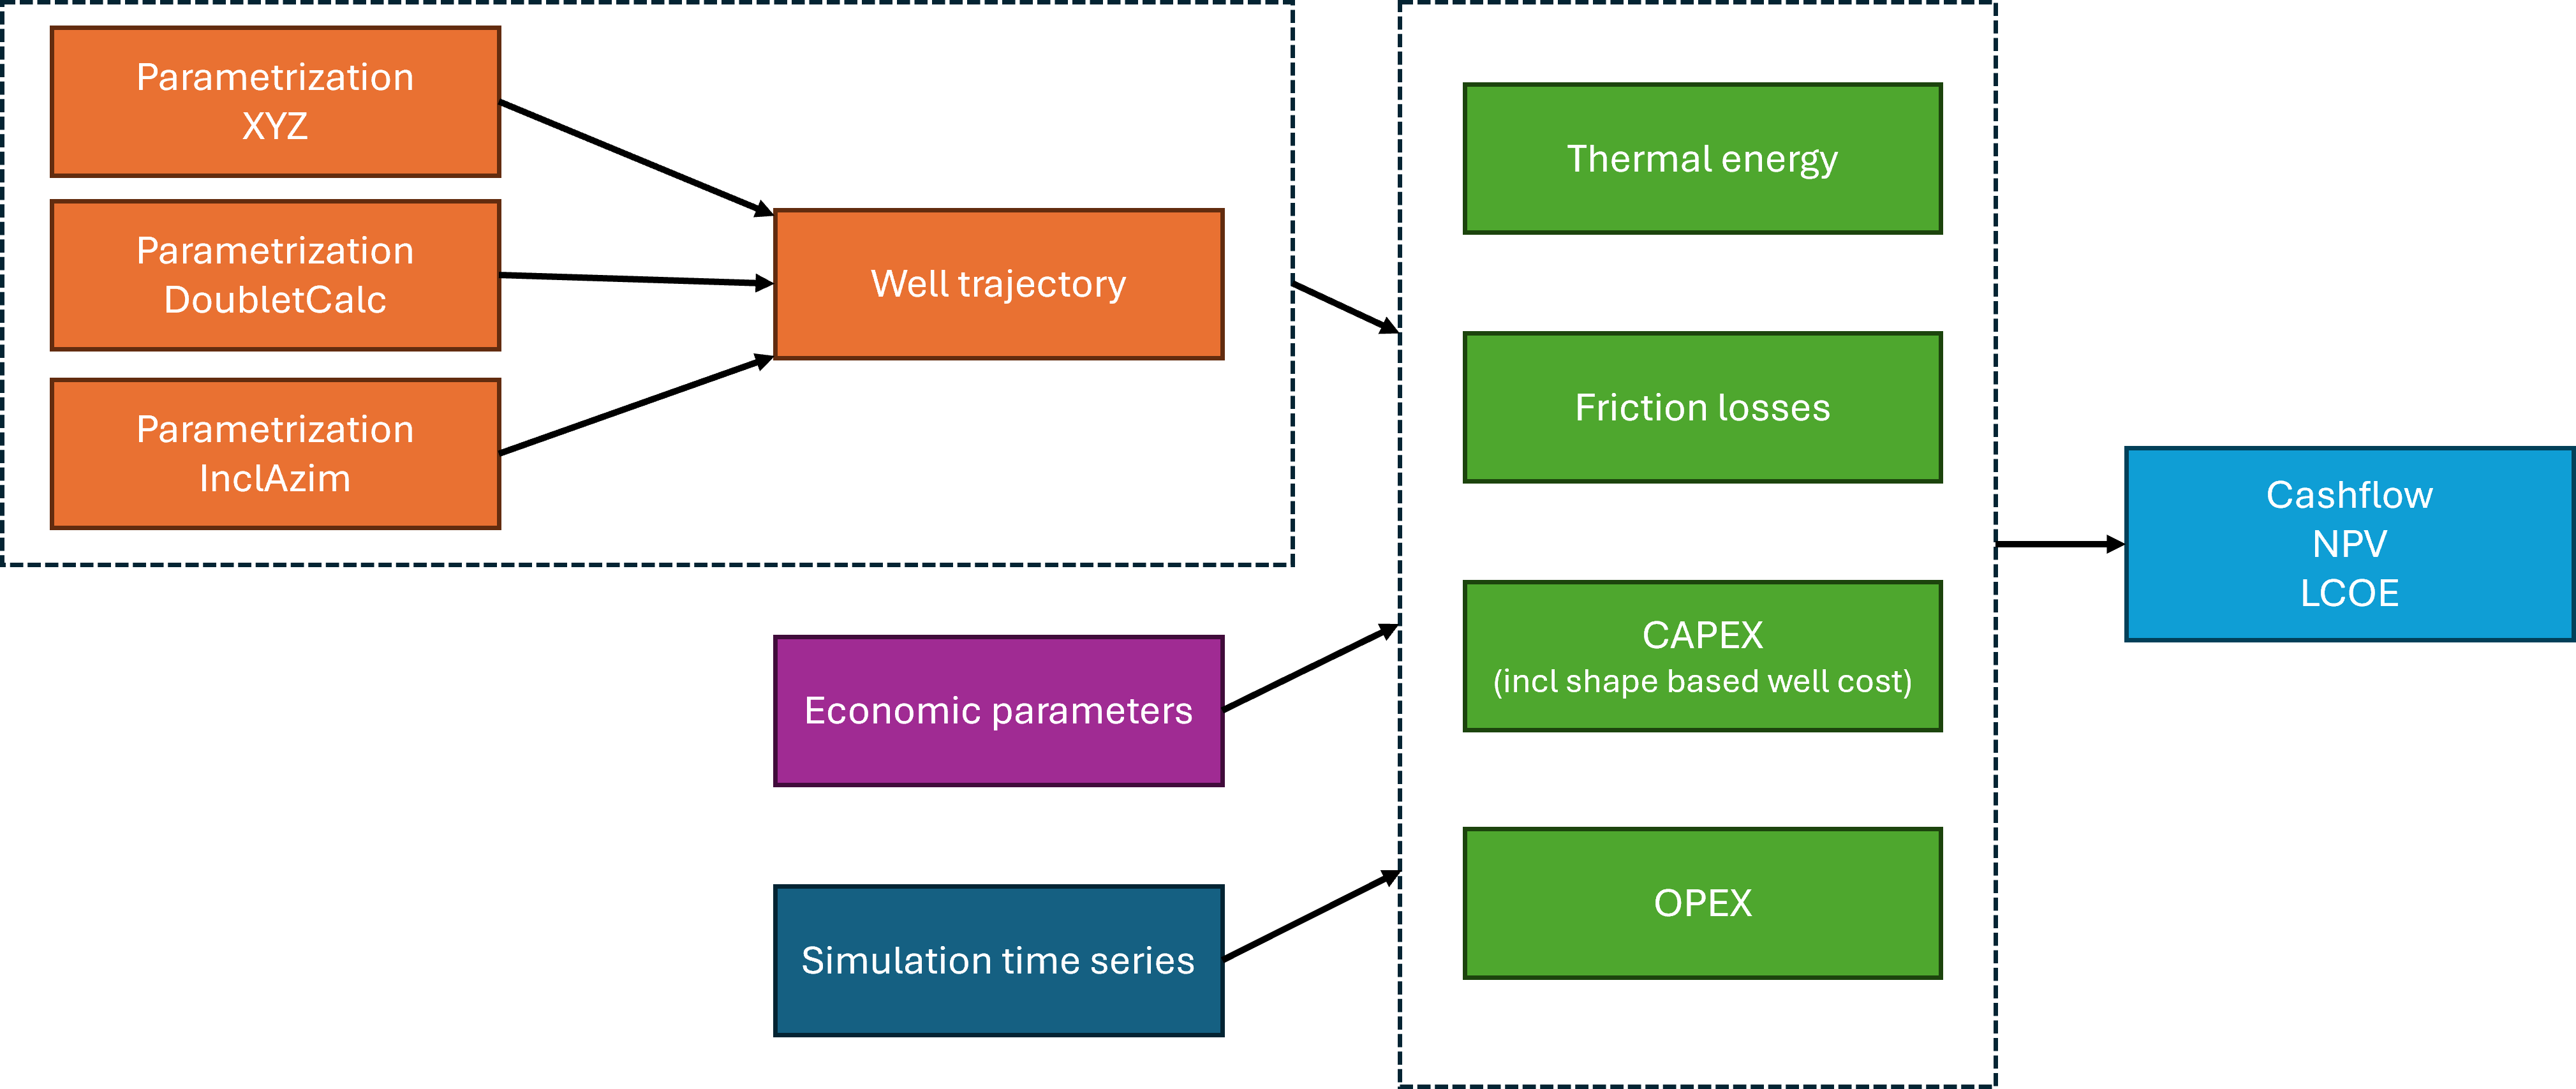
<p align=center> Fig 1: Schematic workflow of PyThermoNomics </p>

## 2. Techno-Economic Equations

#### Net Present Value (NPV)

The Net Present Value (NPV) is the sum of all discounted net revenues over the project lifetime:

$$
\mathrm{NPV} = \sum_{t=0}^{N} \mathrm{DR}(t) = \sum_{t=0}^{N} \frac{\mathrm{NR}(t)}{(1 + r)^{t}}
$$

where:

- $\mathrm{DR}(t)$ is the discounted revenue for each year $t$
- $\mathrm{NR}(t)$ is the net revenue in year $t$
- $r$ is the discount rate
- $t$ is the year index

#### Net Revenue

Net revenue is calculated as:

$$
\mathrm{NR}(t) = \mathrm{GR}(t) - \mathrm{T}(t)
$$

where:

- the gross revenue is calculated as $\mathrm{GR}(t) = \mathrm{I}(t) - \mathrm{C}(t)$
- the tax is calculated as $\mathrm{T}(t) = \max(\mathrm{TGR}(t), 0) \cdot \mathrm{T_r}$
- $\mathrm{T_r}$ is the tax rate
- and the taxable gross revenue is calculated as $\mathrm{TGR}(t) = \mathrm{I}(t) - \mathrm{C_{tax}}(t)$


### Income

The income is based on the produced energy and the heat price (with possible subsidy):

$$
\mathrm{I}(t) = \mathrm{E_{p,w}}(t) \cdot \mathrm{HP}(t)
$$

where:

- $\mathrm{E_{p,w}}(t)$ is the total effective energy contained in produced water
- $\mathrm{HP}(t)$ is either the feed-in price or the regular price, depending on the subsidy period

### Costs

#### Total costs

Total costs are the sum of electricity cost, OPEX, loan payments, and equity:

$$
\mathrm{C}(t) = \mathrm{C_{elec}}(t) + \mathrm{C_{opex}}(t) + \mathrm{IP}(t) + \mathrm{PP}(t) + \mathrm{Eq}
$$

where:

- Electricity costs, $\mathrm{C_{elec}}(t)$, are defined below
- Operational costs, $\mathrm{C_{opex}}(t)$, are defined below

and interest $\mathrm{IP}(t)$ and principal $\mathrm{PP}(t)$ payments are calculated using standard annuity formulas (based on the size of the loan $L$, the loan rate $L_{rate}$, and number of loan years $L_{year}$).

and equity is defined as

$$ 
\mathrm{Eq} = \mathrm{C_{capex,tot}} \cdot \mathrm{Eq}_{\text{share}}
$$

where $\mathrm{C_{capex,tot}}$ is the total CAPEX costs and $\mathrm{Eq}_{\text{share}}$ is the equity share (%) and the loan is defined as

$$ 
\mathrm{L} = \mathrm{C_{capex,tot}} - \mathrm{Eq}
$$

Taxable costs include depreciation:

$$
\mathrm{C_{tax}}(t) = \mathrm{C_{elec}}(t) + \mathrm{C_{opex}}(t) + \mathrm{IP}(t) + \mathrm{D}(t)
$$

#### Capital Expenditure (CAPEX)

The CAPEX is calculated in steps:

$$
\mathrm{C_{capex,o}} = \mathrm{C_{capex,b}} + \mathrm{C_{capex,v}} \cdot \mathrm{P_{i}}(0)
$$

where:

- $\mathrm{C_{capex,b}}$ is the base capital expenditure for the project,
- $\mathrm{C_{capex,v}}$ is the variable capital expenditure per installed kW,
- $\mathrm{P_{i}}(0)$ is the installed power capacity at the start of the project.

The total CAPEX including well costs, contingency, and pump costs is:

$$
\mathrm{C_{capex,tot}} = \left( \mathrm{C_{capex,o}} + \mathrm{C_{wells}} \right) \cdot (1 + \mathrm{C_{capex,c}}) + N_{\text{wi}} \cdot \mathrm{C_{pump}}
$$

where:

- $\mathrm{C_{wells}}$ is the total cost of all wells,
- $\mathrm{C_{capex,c}}$ is the contingency fraction,
- $N_{\text{wi}}$ is the number of injection wells,
- $\mathrm{C_{pump}}$ is the cost per pump.

The CAPEX is assigned to the first year in the cashflow.

#### Electricity Cost

$$
\mathrm{C_{elec}}(t) = (\mathrm{E_{c,inj}}(t) + \mathrm{E_{c,prd}}(t))   \cdot \mathrm{EP} \cdot (1 + \mathrm{i_r})^{t}
$$

where:

- $\mathrm{E_{c,inj}}(t)$ is the energy required to operate the injection pump per well [GJ]
- $\mathrm{E_{c,prd}}(t)$ is the energy required to operate the production pump per well [GJ] 
- $\mathrm{i_r}$ is the inflation rate

### Depreciation

Depreciation is linear over the depreciation period:

$$
\mathrm{D}(t) =
\begin{cases}
\frac{\mathrm{C_{capex,tot}}}{\mathrm{D_{years}}} & \text{if } t \leq \mathrm{D_{years}} \\
0 & \text{otherwise}
\end{cases}
$$

### Fully Expanded NPV Equation

$$
\mathrm{NPV} = \sum_{t=0}^{N} \frac{\mathrm{I}(t) - \mathrm{T}(t) - \mathrm{C}(t)}{(1+r)^{t}} = \sum_{t=0}^{N} \frac{\mathrm{I}(t) - \mathrm{T}(t) - \big(\mathrm{C_{elec}}(t) + \mathrm{C_{opex}}(t) + \mathrm{IP}(t) + \mathrm{PP}(t) + \mathrm{Eq} \big)}{(1+r)^{t}}
$$

### Levelized Cost of Energy (LCOE)

The LCOE is the ratio of discounted costs to discounted energy output:

$$
\mathrm{LCOE} = 100 \cdot
\frac{
\sum_{t=0}^{N} \frac{\mathrm{C_{elec}}(t) + \mathrm{C_{opex}}(t) + \mathrm{IP}(t) + \mathrm{PP}(t) - \mathrm{C_{tax}}(t) \cdot \mathrm{T_r} + \mathrm{Eq}}{(1 + r)^{t}}}
{
\sum_{t=0}^{N} \frac{(\mathrm{E_{p,w}}(t) ) \cdot (1 - \mathrm{T_r})}{(1 + r)^{t}}}
$$

# 3. Structure of the module

<p align=center>
<img src="data/figures/workflow_code.png" width="1500"/>
</p>

### GeothermalEconomics
- Loads project settings and configuration from YAML, Trajectory or Deviation, and Production data (CSV) file(s).
- Manages energy calculations, well cost modeling, and financial computations.
- Provides a unified API for running NPV/LCOE calculations.


# 4. Overview of input / output standards

#### Example Usage
```bash
$ pythermonomics -c config.yml -i sim_data.csv -d deviations/
```

##### Required Parameters

* `-c config.yml`: Path to input configuration file (economic parameters input in YAML format)
* `-i sim_data.csv`: Path to simulation data file (time-series in CSV format)
* `-d deviations/`: Path to directory with deviation files for each well i.e. `WELLNAME1.dev`, `WELLNAME2.dev`, etc.

## Overview of inputs

### Economics Input YAML Documentation

* YAML (YAML Ain't Markup Language) file
* File Extension: `.yml`

This file contains economic-related parameters used as input for geothermal economics calculations. The file consists of a series of parameters, each representing a different economic value. The parameters are:

* `energy_loss_parameters`: 
	+ `well_roughness`: Well roughness in milli inches
	+ `well_tubing`: Well tubing size in inches
* `reservoir_simulation_parameters`:
	+ `injection_temperature`: Injection temperature in °C
	+ `salinity`: Salinity in ppm
* `techno_economic_parameters`: 
	+ `loadhours`: Load hours per year
	+ `wellcost_scaling`: Well cost scaling factor
	+ `well_curvfac`: Well curvature factor
	+ `wellcost_base`: Base well cost in EUR
	+ `wellcost_linear`: Linear well cost in EUR per meter
	+ `wellcost_cube`: Cubic well cost in EUR per meter^2
	+ `pump_efficiency`: Pump efficiency
	+ `pump_cost`: Pump cost in EUR
	+ `pump_life`: Pump life in years
	+ `CAPEX_base`: Base capital expenditures in EUR
	+ `CAPEX_variable`: Variable capital expenditures in EUR per kWth
	+ `CAPEX_contingency`: CAPEX contingency applied to CAPEX and well costs
	+ `OPEX_base`: Base operating expenditures in EUR per year
	+ `OPEX_variable`: Variable operating expenditures in EUR per kWth
	+ `equity_share`: Fraction of equity in project financing
	+ `loan_nyear`: Loan term in years
	+ `loan_rate`: Loan interest rate
	+ `discount_rate`: Discount rate for equity share
	+ `inflation_rate`: Inflation rate
	+ `tax_rate`: Tax rate
	+ `tax_depreciation_nyear`: Tax depreciation period in years
	+ `heat_price`: Heat price in EUR per kWh
	+ `heat_price_feedin`: Heat price for subsidy years in EUR per kWh
	+ `electricity_price`: Electricity price in EUR per kWh
	+ `OPEX_variable_produced`: Variable operating expenditures in EUR per kWh produced
	+ `subsidy_years`: Number of years for subsidy
	+ `lifecycle_years`: Project lifetime in years

##### Example
---
```yaml
energy_loss_parameters:
  well_roughness: 0.1
  well_tubing: 7

reservoir_simulation_parameters:
  injection_temperature: 50
  salinity: 140000

techno_economic_parameters:
  loadhours: 6000
  wellcost_scaling: 1
  well_curvfac: 1.05
  wellcost_base: 250e3
  wellcost_linear: 1000
  wellcost_cube: 0.25
  pump_efficiency: 0.65
  pump_cost: 0.5e6
  pump_life: 5
  CAPEX_base: 3e6
  CAPEX_variable: 300
  CAPEX_contingency: 0.15
  OPEX_base: 10
  OPEX_variable: 50
  OPEX_variable_produced: 1.0
  equity_share: 0.2
  loan_nyear: 15
  loan_rate: 0.05
  discount_rate: 0.15
  inflation_rate: 0.02
  tax_rate: 0.25
  tax_depreciation_nyear: 15
  heat_price: 5
  heat_price_feedin: 5
  electricity_price: 5
  subsidy_years: 15
  lifecycle_years: 30
```
---

### Summary Data CSV Documentation

* Comma-separated values (CSV) file
* File Extension: `.csv`

This file contains well production and injection data from a geothermal simulation, which can be used for geothermal economics calculations. The file consists of a series of columns, each representing a different data point. The required columns are:

* `DATES`: Date of the data point: YYYY-MM-DD
* `FPR`: Field Average Pressure in bars
* `WWPR`: Well Water Production Rate in m3/day
* `WWIR`: Well Water Injection Rate in m3/day
* `WBHP`: Well Bottom Hole Pressure in bars
* `WTICHEA`: Well Injection Temperature in °C
* `WTPCHEA`: Well Production Temperature in °C

The format (column names and units) is consistent with open source flow simulator OPM Flow https://opm-project.org/.
![Img](https://opm-project.org/wp-content/uploads/2015/10/OPM-Flow.png)

##### Example
---
```csv
DATES,FPR,WWPR,WWIR,WBHP,WTICHEA,WTPCHEA
2022-01-01,100,500,2000,1000,150,100
2022-01-02,105,520,2100,1050,155,105
```
---

### Well Trajectory Input File - Deviation file

* Text file with a specific format
* File Extension: `.dev`

This file contains the well trajectory data for a well. The file is used to input the well's trajectory into the geothermal simulation model as well as economics calculation model. The file consists of a series of lines, each representing a point in the well's trajectory. First line contains the well name. Comment line starts with `#`. Each other line contains the following information:

* `X`: The x-coordinate of the point
* `Y`: The y-coordinate of the point
* `TVDMSL`: The true vertical depth of the point below mean sea level
* `MDMSL`: The measured depth of the point below mean sea level

##### Example
---
```csv
WELLNAME: 'INJ1'
#         X              Y         TVDMSL          MDMSL
2917.480000    4860.460000    0.000000000    0.000000000
2917.480000    4860.460000    500.0000000    500.0000000
2014.905693    5859.854755    2702.014954    4417.110301
```
---
The trajectories are generated by open-source 3D viewer and post processing of reservoir models software: ResInsight: https://resinsight.org/ and therefore compatible with the supported format.

![Image](https://resinsight.org/images/getting-started/ResInsightUIMediumSize.png)

## Overview of output

### Summary Data Test CSV Documentation

* Comma-separated values (CSV) file
* File Extension: `.csv`

Contains cash flow data of a geothermal project 
The file consists of the following columns:

- `time[days]`: The time in days
- `enTemp[GJ]`: The energy produced in gigajoules
- `enProd[GJ]`: The production pump energy in gigajoules
- `enInj[GJ]`: The injection pump energy in gigajoules
- `enPower[MW]`: The energy power in megawatts
- `enPowercons[MW]`: The energy power consumption in megawatts
- `capex[euro]`: The capital expenditure in euros
- `opex[euro]`: The operational expenditure in euros
- `income[euro]`: The income in euros
- `ipmt[euro]`: The interest payment in euros
- `ppmt[euro]`: The principal payment in euros
- `cost[euro]`: The total cost in euros
- `grossRev[euro]`: The gross revenue in euros
- `tax[euro]`: The tax in euros
- `netRev[euro]`: The net revenue in euros
- `discRev[euro]`: The discounted revenue in euros
- `npv[euro]`: The net present value in euros
- `lcoe_kWh[euro]`: The levelized cost of energy in euros
- `lcoe_costs[euro]`: The levelized cost of energy costs in euros

## 5. Repository and installation

Install the latest version using pip:

```sh
pip install pythermonomics
```

### Optional Dependencies

- **Documentation:**  
  To build and view the documentation, install with the `docs` extra:
  ```sh
  pip install pythermonomics[docs]
  ```
- **Testing:**  
  To run tests, install with the `tests` extra:
  ```sh
  pip install pythermonomics[tests]
  ```
- **Run Jupyter Notebook example:**  
  To run the notebook example, install with the `notebook` extra:
  ```sh
  pip install pythermonomics[notebook]
  ```

### For this workshop

```sh
# Create a venv:
python -m venv myenv

# Source the venv (Linux):
source myenv/bin/activate

# Or Windows:
myenv\Scripts\activate.bat

# Install PyThermoNomics with additional depedencies:
pip install pythermonomics[docs,tests,notebook]

# Clone the repo:
git clone https://github.com/TNO/pythermonomics.git

# Run Jupyter Notebook:
jupyter notebook --NotebookApp.token=''

# Open the website in your browser of choice: http://localhost:8888/tree or http://127.0.0.1:8888/tree
```

## Documentation

Link to the documentation: https://tno.github.io/pythermonomics/

<p align=center>
<img src="data/figures/landing_page_docs.png" width="800"/>
</p>

## 6. Geothermal aquifer example

### Geothermal aquifer

Synthetic aquifer model with geological properties generated by a geologist. The model has dimensions of 123x149x28 and consists of approximately 500 000 cells. The average cell size is 50m in X and Y direction and 5m in depth. Permeability varies between 1 and 890mD with an average of 580mD. Porosity is correlated to permeability and varies between 0.01 and 0.21. The thickness of the aquifer varies between approximately 50m and 200m (about 150m around the doublet). The intiial water temperature varies between 82C and 107C (about 95C at the top of the reservoir where the doublet is located). 

<table>
  <tr>
    <td style="text-align: center;">
      <p><strong>Depth profile</strong></p>
      <img src="data/figures/DEPTH.png" width="600"/>
    </td>
    <td style="text-align: center;">
      <p><strong>Permeability field</strong></p>
      <img src="data/figures/PERMX.png" width="600"/>
    </td>
  </tr>
  <tr>
    <td style="text-align: center;">
      <p><strong>Porosity field</strong></p>
      <img src="data/figures/PORO.png" width="600"/>
    </td>
    <td style="text-align: center;">
      <p><strong>Temperature field</strong></p>
      <img src="data/figures/TEMP.png" width="600"/>
    </td>
  </tr>
</table>

### Well trajectories: doublet

Blue pipe represents the injector and gray is the producer.

#### Scenario 1: vertical (slighly deviated) wells

<table>
  <tr>
    <td style="text-align: center;">
      <p><strong>Zoom in</strong></p>
      <img src="data/figures/wells_vt1.png" width="600"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/wells_vt2.png" width="600"/>
    </td>
  </tr>
</table>


#### Scenario 2: horizontal (strongly deviated) wells

<table>
  <tr>
    <td style="text-align: center;">
      <p><strong>Zoom in</strong></p>
      <img src="data/figures/wells_hz1.png" width="600"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/wells_hz2.png" width="600"/>
    </td>
  </tr>
</table>

### Production front

![SegmentLocal](data/figures/cold_front.gif "segment")

<table>
  <tr>
    <td style="text-align: center;">
      <img src="data/figures/snapshots/TEMP_1.png" width="400"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/snapshots/TEMP_2.png" width="400"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/snapshots/TEMP_3.png" width="400"/>
    </td>
  </tr>
</table>
<table>
  <tr>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/snapshots/TEMP_4.png" width="400"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/snapshots/TEMP_5.png" width="400"/>
    </td>
    <td style="text-align: center;">
      <p><strong></strong></p>
      <img src="data/figures/snapshots/TEMP_6.png" width="400"/>
    </td>
  </tr>
</table>

---

## Exercise (interactive)

Although,  PyThermoNomics can be run as a stand-alone python application with a set of input files:

```bash
$ pythermonomics -c config.yml -i sim_data.csv -d deviations/
```
since it is open-sourced, it can also be loaded as a library in python. This part of the notebook walks you through a minimal end‑to‑end **techno‑economic** run using your project's Python API.

## What you'll do
1. (Optionally) install the project and Jupyter dependencies.
2. Configure paths to your input files (config, summary file, well path deviations).
3. Run the economic model to compute **NPV** and **LCOE** and retrieve result tables.
4. Inspect the output
5. Compare two cases (vertical vs. horizontal wells)
6. Explore different settings and their impact/sensitivity on the output (**NPV** and **LCOE**)

> **Kernel tip**: If you're running this inside VS Code, select the Python interpreter for your virtual environment from the **Select Kernel** menu. If you installed JupyterLab, just start it from the same virtual environment so the correct kernel is used.

In [1]:
# Optional: install the package + notebook extras from a repo checkout
# (Uncomment the line that fits your setup, then run the cell.)
# %pip install -e '.[notebook]'
# If the package is on PyPI under a different name, use (example):
# %pip install geothermal-economics[notebook]

In [2]:
from __future__ import annotations
from pathlib import Path
import sys
import pandas as pd
from pythermonomics.geothermal_economics import GeothermalEconomics
print(f'Python: {sys.version.split()[0]}')
print('pandas:', pd.__version__)


Python: 3.11.13
pandas: 2.3.1


# Vertical wells case

## Configure input paths
Notebook is located in the examples folder in the root of the project. Cases are stored in data/CASE_NAME.

In [3]:
# Base directory (project root)
NOTEBOOK_ROOT = Path.cwd()

# Case and data folder:
CASE_NAME = 'vertical_wells'
DATA_DIR = NOTEBOOK_ROOT / 'data' / CASE_NAME

# Required inputs
CONFIG_FILE = DATA_DIR / 'economics_input.yml'
DEVIATION_DIR = DATA_DIR / 'well_paths'
SUMMARY_FILE = DATA_DIR / 'sim_time_series.csv'

for p in [CONFIG_FILE, SUMMARY_FILE, DEVIATION_DIR]:
    assert p.exists(), f'Missing input: {p}'
    print(p)
print('Inputs found.')


/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/vertical_wells/economics_input.yml
/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/vertical_wells/sim_time_series.csv
/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/vertical_wells/well_paths
Inputs found.


In [4]:
# Instantiate the GeothermalEconomics class and run the LCOE calculation
gt_econ = GeothermalEconomics.from_summary_deviation_file(
    str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR)
)
npv, lcoe, cashflow_vt, simdata_vt, well_states, well_results = gt_econ.compute_economics()

print(f'NPV: {npv:,.0f}')
print(f'LCOE: {lcoe:.4f}')

display(cashflow_vt.head())
display(well_results.head())


NPV: 21,974,869
LCOE: 3.7658


,time[days],year[years],dTime[days],injTemp[C],enTemp[GJ],enProd[GJ],enPower[MW],enPowercons[MW],COP[-],capex[euro],...,cost[euro],costTax[euro],grossRev[euro],grossRevTax[euro],tax[euro],netRev[euro],discRev[euro],npv[euro],lcoe_kWh[euro],lcoe_costs[euro]
0,365.0,1,365.0,30.0,760184.652470,10913.689694,24.105297,0.729886,33.026111,3.158426e+07,...,1.289521e+07,7.513026e+06,-2.254668e+05,5.156718e+06,1.289179e+06,-1.514646e+06,-1.317084e+06,-1.317084e+06,1.583718e+08,4.700102e+06
1,730.0,2,365.0,30.0,758892.841542,10841.344631,24.064334,0.725232,33.181553,0.000000e+00,...,6.654863e+06,7.530983e+06,5.993351e+06,5.117231e+06,1.279308e+06,4.714043e+06,3.564494e+06,2.247410e+06,1.581027e+08,4.772117e+06
2,1095.0,3,365.0,30.0,759301.031450,10837.424585,24.077278,0.725108,33.205092,0.000000e+00,...,6.740143e+06,7.554788e+06,5.914874e+06,5.100229e+06,1.275057e+06,4.639817e+06,3.050755e+06,5.298165e+06,1.581877e+08,4.851446e+06
3,1460.0,4,365.0,30.0,759643.530976,10834.149999,24.088138,0.725004,33.224848,0.000000e+00,...,6.827003e+06,7.577100e+06,5.833722e+06,5.083625e+06,1.270906e+06,4.562816e+06,2.608805e+06,7.906970e+06,1.582591e+08,4.932728e+06
4,1825.0,5,365.0,30.0,761968.103503,10896.522956,24.161850,0.729341,33.128320,0.000000e+00,...,7.475950e+06,8.158271e+06,5.223518e+06,4.541197e+06,1.135299e+06,4.088219e+06,2.032567e+06,9.939538e+06,1.587434e+08,5.436382e+06


,time[days],year[years],dTime[days],injTemp[C],temp_INJ[C],wicum_INJ[m3],winj_INJ[m3],wiRate_INJ[m3/day],temp_PRD[C],wpcum_PRD[m3],wprod_PRD[m3],wpRate_PRD[m3/day],dTemp_PRD[C],avgInjP[bar],enInj_INJ[GJ],dP_INJ[bar],enTemp_PRD[GJ],enProd_PRD[GJ],dP_PRD[bar],enInj[GJ]
0,365.0,1,365.0,30.0,30.0,2928000.0,2.925996e+06,8016.427105,97.545036,2928000.0,2.925996e+06,8016.427105,67.545036,266.543488,12103.996219,26.888614,760184.652470,10913.689694,24.244389,12103.996219
1,730.0,2,365.0,30.0,30.0,5848000.0,2.918001e+06,7994.524298,97.617180,5848000.0,2.918001e+06,7994.524298,67.617180,266.543335,12029.581130,26.796518,758892.841542,10841.344631,24.149660,12029.581130
2,1095.0,3,365.0,30.0,30.0,8768000.0,2.918001e+06,7994.524298,97.654686,8768000.0,2.918001e+06,7994.524298,67.654686,266.543335,12029.581130,26.796518,759301.031450,10837.424585,24.140928,12029.581130
3,1460.0,4,365.0,30.0,30.0,11688000.0,2.918001e+06,7994.524298,97.686157,11688000.0,2.918001e+06,7994.524298,67.686157,266.543304,12029.567430,26.796488,759643.530976,10834.149999,24.133633,12029.567430
4,1825.0,5,365.0,30.0,30.0,14616000.0,2.925996e+06,8016.427105,97.708458,14616000.0,2.925996e+06,8016.427105,67.708458,266.543304,12103.982482,26.888584,761968.103503,10896.522956,24.206254,12103.982482


## Horizontal wells

In [5]:
# Base directory (project root)
NOTEBOOK_ROOT = Path.cwd()

# Case and data folder:
CASE_NAME = 'horizontal_wells'
DATA_DIR = NOTEBOOK_ROOT / 'data' / CASE_NAME

# Required inputs
CONFIG_FILE = DATA_DIR / 'economics_input.yml'
DEVIATION_DIR = DATA_DIR / 'well_paths'
SUMMARY_FILE = DATA_DIR / 'sim_time_series.csv'

for p in [CONFIG_FILE, SUMMARY_FILE, DEVIATION_DIR]:
    assert p.exists(), f'Missing input: {p}'
    print(p)
print('Inputs found.')

# Instantiate the GeothermalEconomics class and run the LCOE calculation
gt_econ = GeothermalEconomics.from_summary_deviation_file(
    str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR)
)
npv, lcoe, cashflow_hz, simdata_hz, well_states, well_results = gt_econ.compute_economics()

print(f'NPV: {npv:,.0f}')
print(f'LCOE: {lcoe:.4f}')

display(cashflow_hz.head())
display(well_results.head())

/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/horizontal_wells/economics_input.yml
/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/horizontal_wells/sim_time_series.csv
/remotefs/ka_uprojects/060/4/42622_unix/Szklarz/2025/economics/pythermonomics/examples/data/horizontal_wells/well_paths
Inputs found.
NPV: 20,067,389
LCOE: 3.9739


,time[days],year[years],dTime[days],injTemp[C],enTemp[GJ],enProd[GJ],enPower[MW],enPowercons[MW],COP[-],capex[euro],...,cost[euro],costTax[euro],grossRev[euro],grossRevTax[euro],tax[euro],netRev[euro],discRev[euro],npv[euro],lcoe_kWh[euro],lcoe_costs[euro]
0,365.0,1,365.0,30.0,765201.854988,11002.289607,24.264392,0.708198,34.262149,3.525638e+07,...,1.406573e+07,8.057786e+06,-1.312361e+06,4.695578e+06,1.173894e+06,-2.486256e+06,-2.161962e+06,-2.161962e+06,1.594171e+08,5.000004e+06
1,730.0,2,365.0,30.0,765556.609459,10907.604226,24.275641,0.702728,34.544870,0.000000e+00,...,7.097223e+06,8.075205e+06,5.662054e+06,4.684072e+06,1.171018e+06,4.491036e+06,3.395868e+06,1.233907e+06,1.594910e+08,5.078422e+06
2,1095.0,3,365.0,30.0,766088.685674,10902.422558,24.292513,0.702564,34.576922,0.000000e+00,...,7.185952e+06,8.095312e+06,5.582192e+06,4.672833e+06,1.168208e+06,4.413984e+06,2.902266e+06,4.136173e+06,1.596018e+08,5.162124e+06
3,1460.0,4,365.0,30.0,766518.658712,10898.289982,24.306147,0.702433,34.602804,0.000000e+00,...,7.276258e+06,8.113564e+06,5.499053e+06,4.661747e+06,1.165437e+06,4.333616e+06,2.477759e+06,6.613932e+06,1.596914e+08,5.247867e+06
4,1825.0,5,365.0,30.0,768899.313122,10966.431869,24.381637,0.707064,34.482940,0.000000e+00,...,7.928894e+06,8.690544e+06,4.886095e+06,4.124444e+06,1.031111e+06,3.854984e+06,1.916608e+06,8.530540e+06,1.601874e+08,5.756258e+06


,time[days],year[years],dTime[days],injTemp[C],temp_INJ[C],wicum_INJ[m3],winj_INJ[m3],wiRate_INJ[m3/day],temp_PRD[C],wpcum_PRD[m3],wprod_PRD[m3],wpRate_PRD[m3/day],dTemp_PRD[C],avgInjP[bar],enInj_INJ[GJ],dP_INJ[bar],enTemp_PRD[GJ],enProd_PRD[GJ],dP_PRD[bar],enInj[GJ]
0,365.0,1,365.0,30.0,30.0,2928000.0,2.925996e+06,8016.427105,97.999458,2928000.0,2.925996e+06,8016.427105,67.999458,262.349121,11331.448439,25.172426,765201.854988,11002.289607,24.441211,11331.448439
1,730.0,2,365.0,30.0,30.0,5848000.0,2.918001e+06,7994.524298,98.224236,5848000.0,2.918001e+06,7994.524298,68.224236,262.349426,11253.619809,25.068024,765556.609459,10907.604226,24.297256,11253.619809
2,1095.0,3,365.0,30.0,30.0,8768000.0,2.918001e+06,7994.524298,98.273148,8768000.0,2.918001e+06,7994.524298,68.273148,262.349518,11253.647209,25.068085,766088.685674,10902.422558,24.285714,11253.647209
3,1460.0,4,365.0,30.0,30.0,11688000.0,2.918001e+06,7994.524298,98.312675,11688000.0,2.918001e+06,7994.524298,68.312675,262.349487,11253.633509,25.068055,766518.658712,10898.289982,24.276508,11253.633509
4,1825.0,5,365.0,30.0,30.0,14616000.0,2.925996e+06,8016.427105,98.338402,14616000.0,2.925996e+06,8016.427105,68.338402,262.349487,11331.530864,25.172609,768899.313122,10966.431869,24.361554,11331.530864


## Compare the cashflows for the scenarios
### First let's compare the simulation data

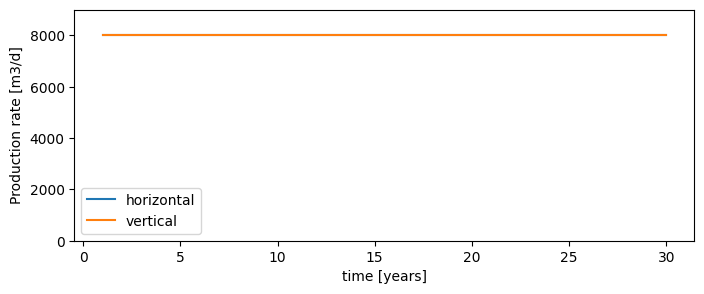

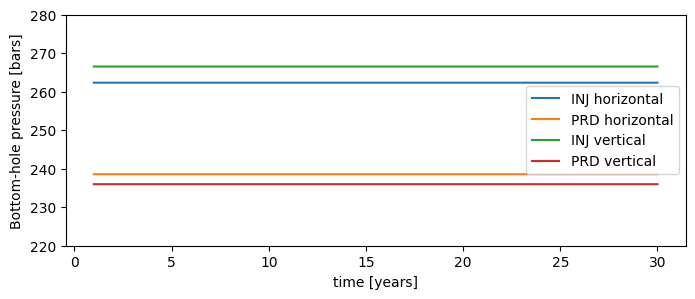

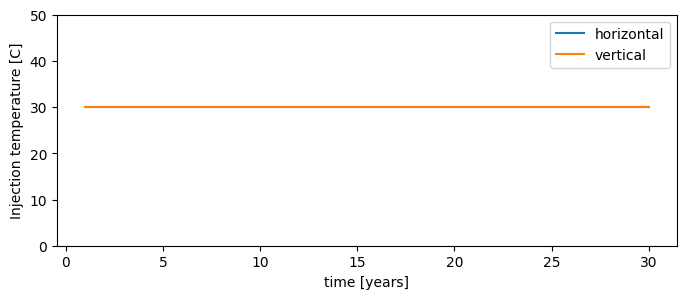

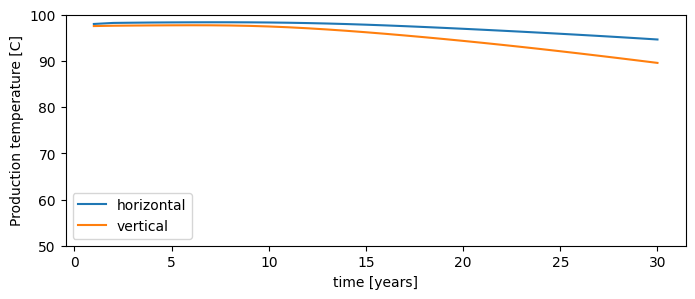

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.plot(simdata_hz["YEARS"], simdata_hz['WWPR:PRD'], label='horizontal')
plt.plot(simdata_vt["YEARS"], simdata_vt['WWPR:PRD'], label='vertical')
plt.ylim(0, 9000)
plt.legend()
plt.xlabel('time [years]')
plt.ylabel('Production rate [m3/d]')
plt.show()

plt.figure(figsize=(8,3))
plt.plot(simdata_hz["YEARS"], simdata_hz['WBHP:INJ'], label='INJ horizontal')
plt.plot(simdata_hz["YEARS"], simdata_hz['WBHP:PRD'], label='PRD horizontal')
plt.plot(simdata_vt["YEARS"], simdata_vt['WBHP:INJ'], label='INJ vertical')
plt.plot(simdata_vt["YEARS"], simdata_vt['WBHP:PRD'], label='PRD vertical')
plt.ylim(220, 280)
plt.legend()
plt.xlabel('time [years]')
plt.ylabel('Bottom-hole pressure [bars]')
plt.show()

plt.figure(figsize=(8,3))
plt.plot(simdata_hz["YEARS"], simdata_hz['WTICHEA:INJ'], label='horizontal')
plt.plot(simdata_vt["YEARS"], simdata_vt['WTICHEA:INJ'], label='vertical')
plt.ylim(0, 50)
plt.legend()
plt.xlabel('time [years]')
plt.ylabel('Injection temperature [C]')
plt.show()

plt.figure(figsize=(8,3))
plt.plot(simdata_hz["YEARS"], simdata_hz['WTPCHEA:PRD'], label='horizontal')
plt.plot(simdata_vt["YEARS"], simdata_vt['WTPCHEA:PRD'], label='vertical')
plt.ylim(50, 100)
plt.legend()
plt.xlabel('time [years]')
plt.ylabel('Production temperature [C]')
plt.show()

##### Notes
- The horizontal wells scenario reaches higher temperature due to wells reaching deeper parts of the aquifer.
- The cold water breakthrough is dealyed in horizontal scenario since the the distance between the wells in teh aquifer is slighly larger.

### Now let's compare cashflow results

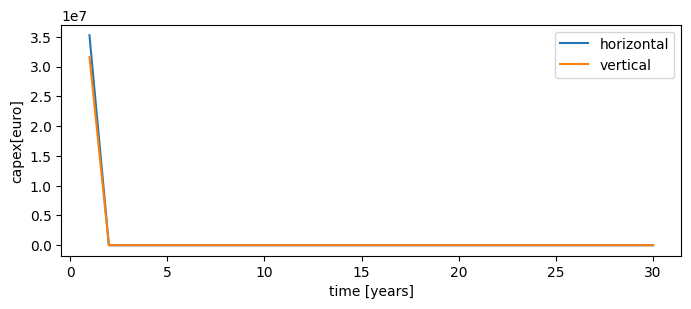

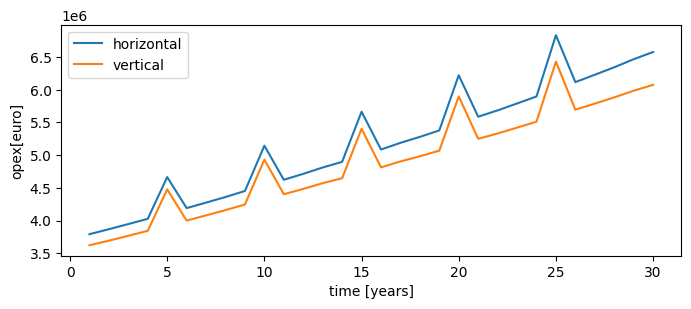

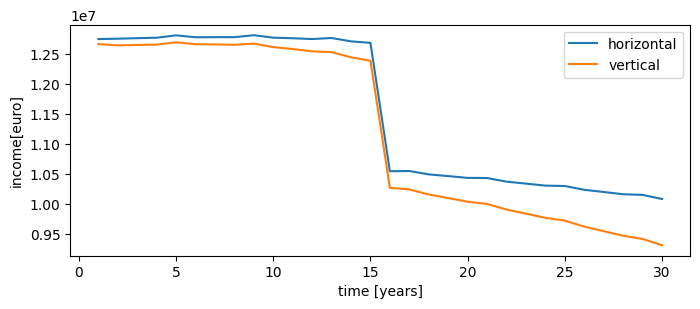

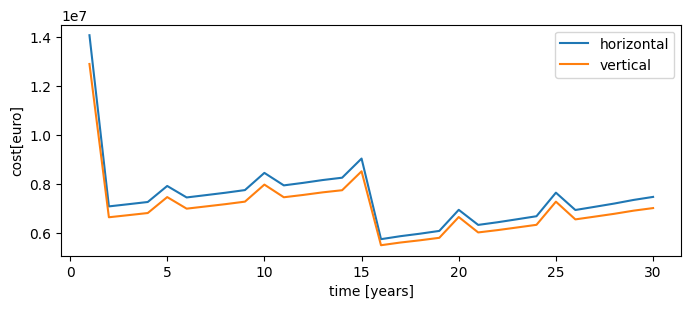

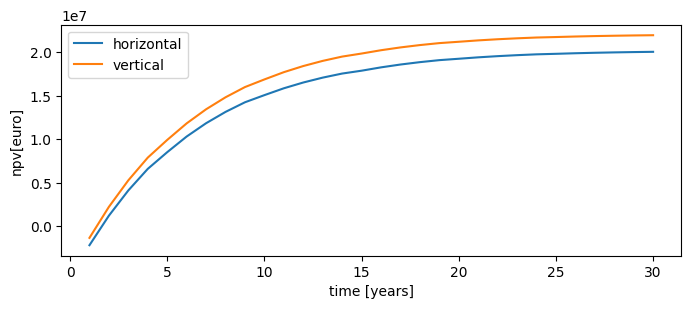

In [7]:
import matplotlib.pyplot as plt

#column_to_plot = cashflow.columns
column_to_plot = ['capex[euro]', 'opex[euro]', 'income[euro]', 'cost[euro]', 'npv[euro]']

for column in column_to_plot:
    plt.figure(figsize=(8,3))
    plt.plot(cashflow_hz['year[years]'], cashflow_hz[column], label='horizontal')
    plt.plot(cashflow_vt['year[years]'], cashflow_vt[column], label='vertical')
    plt.legend()
    plt.xlabel('time [years]')
    plt.ylabel(column)
    plt.show()

##### Notes
- CAPEX costs are higher for vertical case due to longer wells.
- The pump is exchanged avery 5 years - it is visible in opex.
- The income drop at 15 year mark is attributed to loss of subsidy.
- Despite better production temperature profile the cost of the specific horizontal scenario was too high to improve NPV over the NPV of the vertical scenario (Note that the prescribed rates were reached with both well scenarios).


## Impact of economic parameters


### Heat price

heat_price_feedin: 5.5, heat_price: 5
heat_price_feedin: 6.0, heat_price: 5.5
heat_price_feedin: 6.5, heat_price: 6


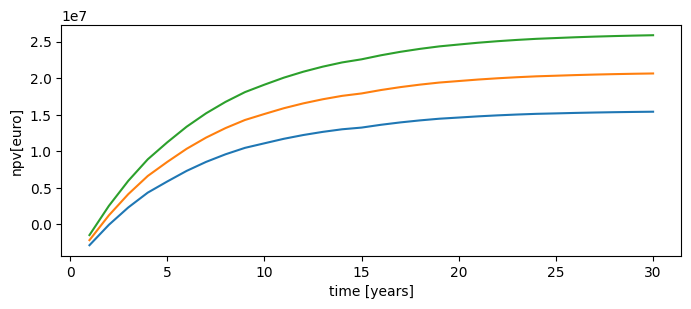

In [8]:
import matplotlib.pyplot as plt

gt_econ = GeothermalEconomics.from_summary_deviation_file(
    str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR)
)

cashflows = []
heat_prices = [5,5.5,6]
heat_prices_feedin = [5.5, 6.0, 6.5]
for heat_price, heat_price_feedin in zip(heat_prices, heat_prices_feedin):
    print(f'heat_price_feedin: {heat_price_feedin}, heat_price: {heat_price}')
    gt_econ.economics_config.techno_eco_param.heat_price = heat_price
    gt_econ.economics_config.techno_eco_param.heat_price_feedin = heat_price_feedin
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    cashflows.append(cashflow.copy())
    
column = 'npv[euro]'
plt.figure(figsize=(8,3))
for cashflow in cashflows:
    plt.plot(cashflow['year[years]'], cashflow[column])
plt.xlabel('time [years]')
plt.ylabel(column)
plt.show()

### Electricity price

electricity_price: 7
electricity_price: 8
electricity_price: 9


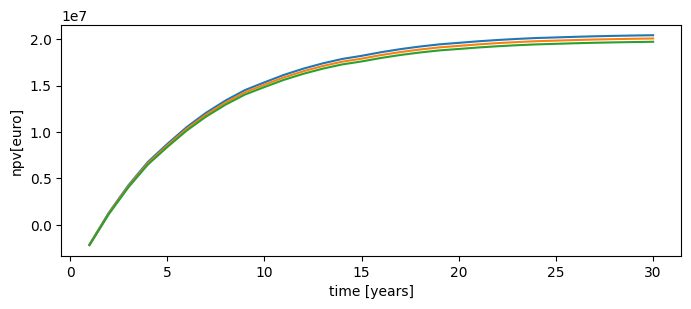

In [9]:
import matplotlib.pyplot as plt

gt_econ = GeothermalEconomics.from_summary_deviation_file(
    str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR)
)

cashflows = []
electricity_prices = [7, 8, 9]
for electricity_price in electricity_prices:
    print(f'electricity_price: {electricity_price}')
    gt_econ.economics_config.techno_eco_param.electricity_price = electricity_price
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    cashflows.append(cashflow.copy())
    
column = 'npv[euro]'
plt.figure(figsize=(8,3))
for cashflow in cashflows:
    plt.plot(cashflow['year[years]'], cashflow[column])
plt.xlabel('time [years]')
plt.ylabel(column)
plt.show()

### Subsidy duration

subsidy_years: 5
subsidy_years: 10
subsidy_years: 15


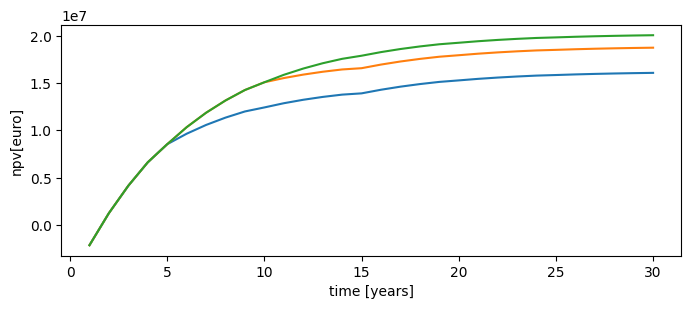

In [10]:
import matplotlib.pyplot as plt

gt_econ = GeothermalEconomics.from_summary_deviation_file(
    str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR)
)

subsidies_years = [5, 10, 15]
cashflows = []
for subsidy_years in subsidies_years:
    print(f'subsidy_years: {subsidy_years}')
    gt_econ.economics_config.techno_eco_param.subsidy_years = subsidy_years
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    cashflows.append(cashflow.copy())

column = 'npv[euro]'
plt.figure(figsize=(8,3))
for cashflow in cashflows:
    plt.plot(cashflow['year[years]'], cashflow[column])
plt.xlabel('time [years]')
plt.ylabel(column)
plt.show()

#### Impact between different parameters

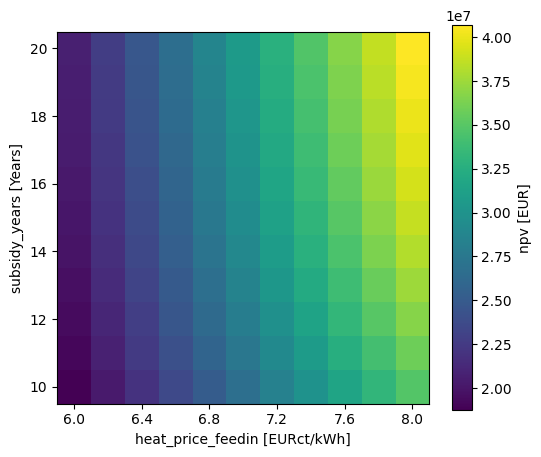

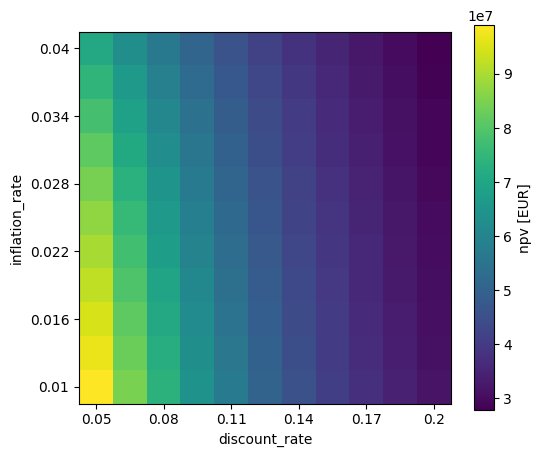

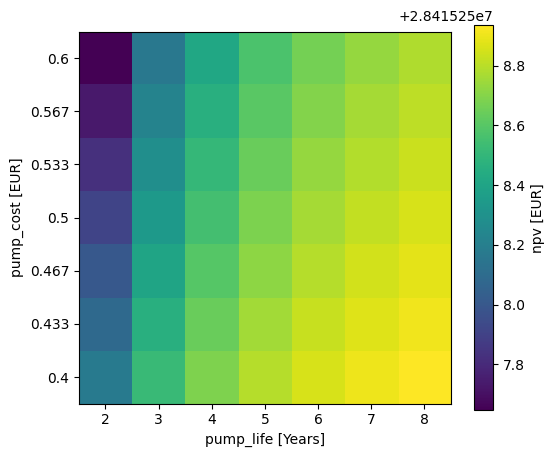

In [11]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_scatter(x, y, npvs, xlab, ylab, digits, freq=2, figsize=(6,5)):
    npvs = np.reshape(npvs, (len(x), len(y)), order='F')    
    #npvs = np.flip(npvs, axis=0)
    plt.figure(figsize=figsize)
    plt.imshow(npvs, cmap='viridis')
    x = [round(e, digits[0]) for e in x]
    y = [round(e, digits[1]) for e in y]
    plt.xticks(np.arange(len(x))[::freq], x[::freq])
    plt.yticks(np.arange(len(y))[::freq], y[::freq])
    #plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.colorbar(label="npv [EUR]")
    plt.show()

gt_econ = GeothermalEconomics.from_summary_deviation_file(
str(CONFIG_FILE), summary_file=str(SUMMARY_FILE), deviation_files_dir=str(DEVIATION_DIR),
)

x = np.linspace(6, 8, 11) # heat_price_feedin [EURct/kWh]
y = np.linspace(10, 20, 11) # subsidy_years [Years]
y = y.astype(int)
params = list(product(x, y))
x_vec = [float(e[0]) for e in params]
y_vec = [float(e[1]) for e in params]

npvs = []
for param in params: 
    gt_econ.economics_config.techno_eco_param.heat_price_feedin = param[0]
    gt_econ.economics_config.techno_eco_param.subsidy_years = param[1]
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    npvs.append(float(npv))

plot_scatter(x, y, npvs, 'heat_price_feedin [EURct/kWh]','subsidy_years [Years]', (1,0))

x = np.linspace(0.05, 0.2, 11) # discount_rate
y = np.linspace(0.01, 0.04, 11) # inflation_rate
params = list(product(x, y))
x_vec = [float(e[0]) for e in params]
y_vec = [float(e[1]) for e in params]

npvs = []
for param in params:
    gt_econ.economics_config.techno_eco_param.discount_rate = param[0]
    gt_econ.economics_config.techno_eco_param.inflation_rate = param[1]
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    npvs.append(float(npv))
plot_scatter(x, y, npvs, 'discount_rate','inflation_rate', (2,3), figsize=(6,5))

N = 7
x = np.linspace(2, 8, N) # pump_life [Years]
x = x.astype(int)
y = np.linspace(0.4, 0.6, N) # pump_cost [EUR]
params = list(product(x, y))
x_vec = [float(e[0]) for e in params]
y_vec = [float(e[1]) for e in params]

npvs = []
for param in params:
    gt_econ.economics_config.techno_eco_param.pump_life = param[0]
    gt_econ.economics_config.techno_eco_param.pump_cost = param[1]
    npv, lcoe, cashflow, simdata, well_states, well_results = gt_econ.compute_economics()
    npvs.append(float(npv))
plot_scatter(x, y, npvs, 'pump_life [Years]','pump_cost [EUR]', (0,3), freq=1, figsize=(6,5))


# 7. Conclusions and future outlook

- Open sourcing (Done!).
- Support for production data coming from various different flow simulators.
- Support for additional well trajectory parametrizations.
- Various code and usability improvements.
- Extending documentation.

The PyThermoNomics has been used in:
 
Barros, E.G.D.; Szklarz, S.P.; Khoshnevis Gargar, N.; Wollenweber, J.; van Wees, J.D. Optimization of Well Locations and Trajectories: Comparing Sub-Vertical, Sub-Horizontal and Multi-Lateral Well Concepts for Marginal Geothermal Reservoir in The Netherlands. Energies 2025, 18, 627. https://doi.org/10.3390/en18030627

---